In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

plt.style.use("default")

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, Y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, Y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [31]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

print(accuracy_score(Y_train, y_pred_train))
print(accuracy_score(Y_test, y_pred))


1.0
0.8


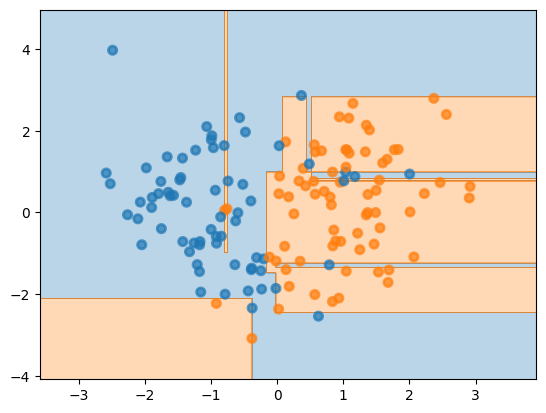

In [9]:
plot_surface(dt, X_train, Y_train)

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [10]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 20})

In [11]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state = 42) 

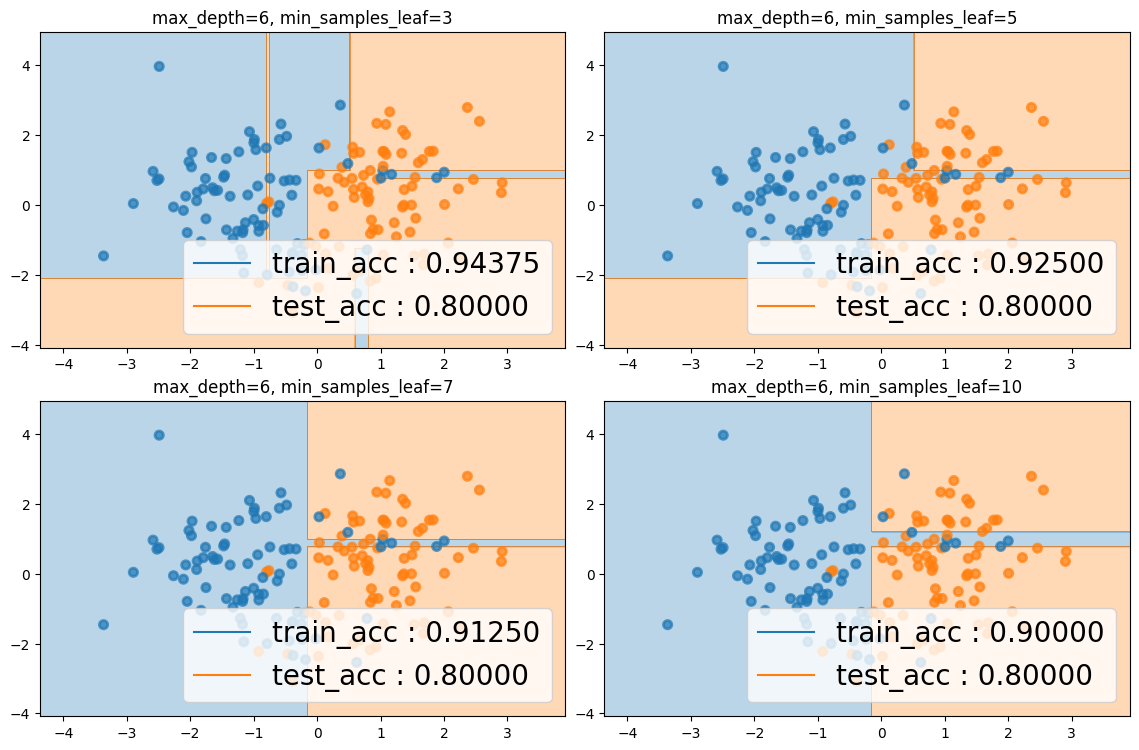

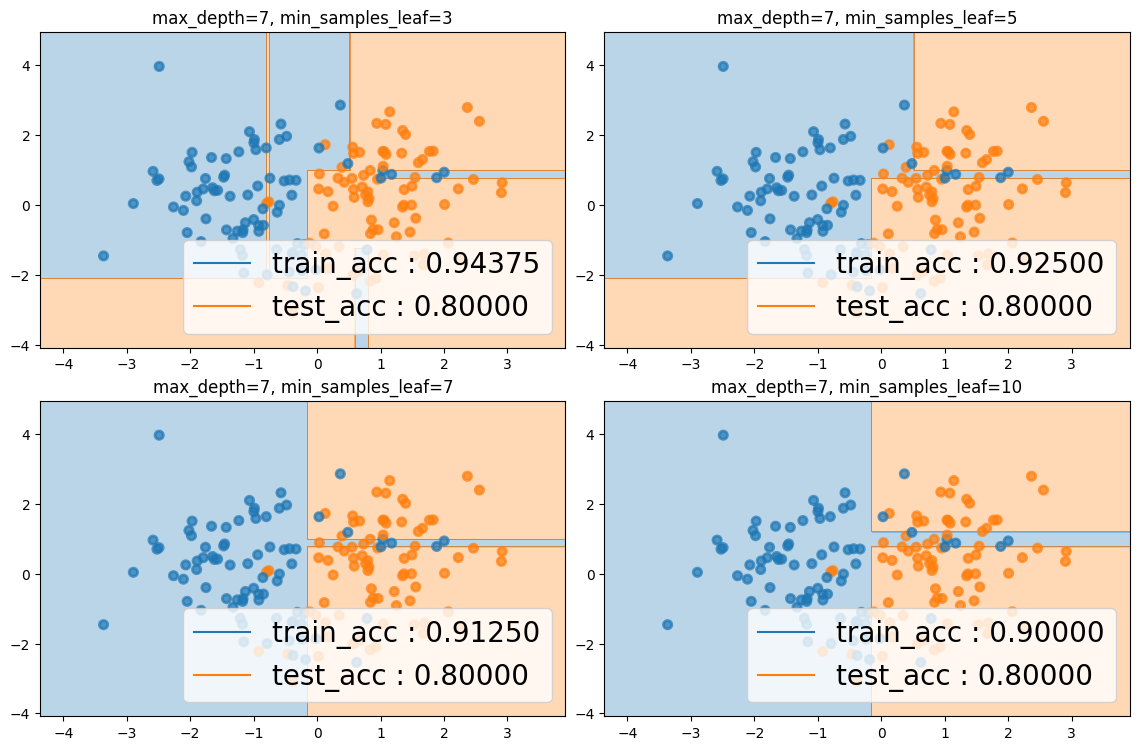

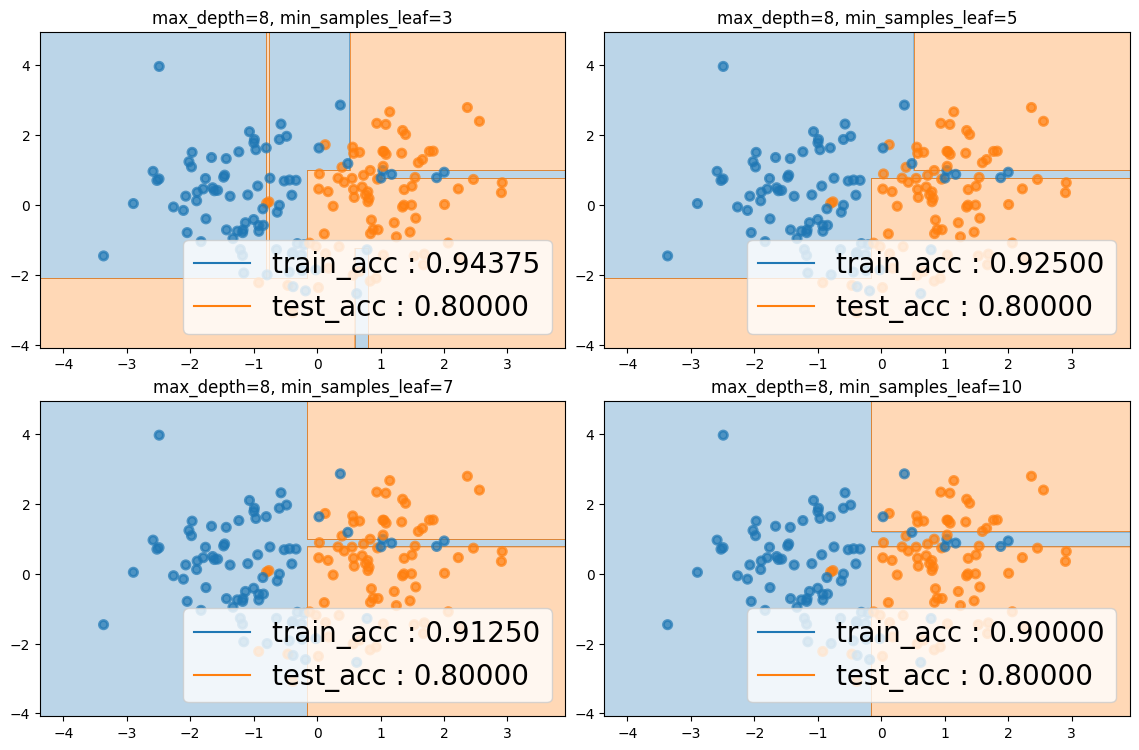

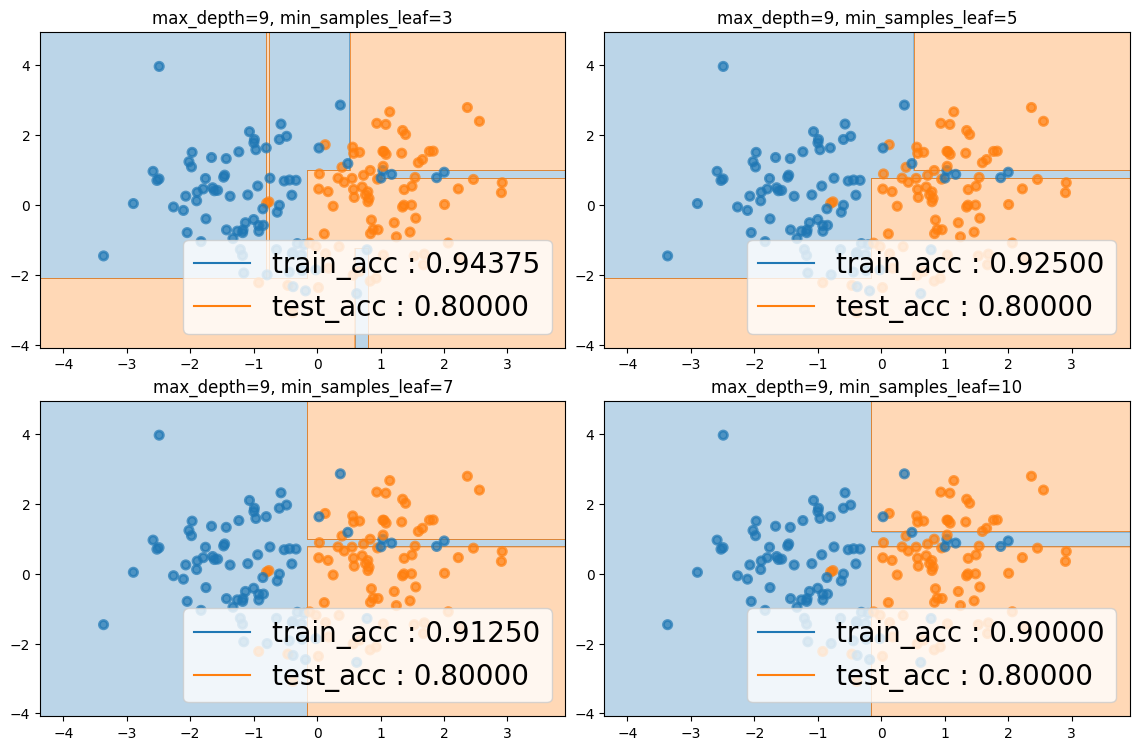

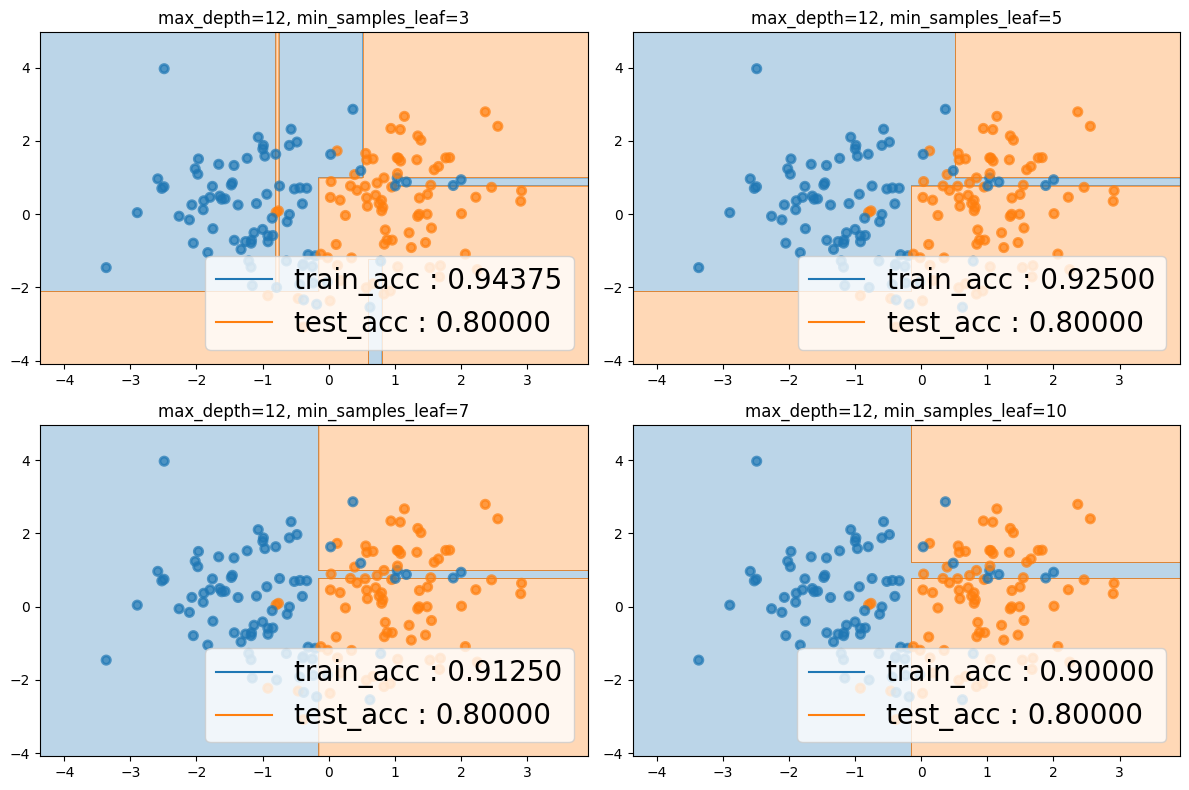

In [13]:
### Your code is here
for max_depth in max_depth_set:
    fig = plt.figure(figsize=(12, 8))

    for min_samples_leaf in min_samples_leaf_set:
        tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, Y_train)

        train_acc = tree.score(X_train, Y_train)
        test_acc = tree.score(X_test, Y_test)

        ax = fig.add_subplot(2, 2, min_samples_leaf_set.index(min_samples_leaf) + 1)

        plot_surface_axes(tree, X_train, Y_train, ax, train_acc, test_acc)

        ax.set_title(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")

plt.tight_layout()
plt.show()


__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")

    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self

    def transform(self, X, y=None):

        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)

        print("Трансформировали датасет!")
        return X_



In [15]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [16]:
from sklearn.pipeline import Pipeline

### Your code is here

custom = CustomFunctionTransformer("x1", "x2", lambda x,y: 2 * x - y)

custom.fit(X_train)

custom.transform(X_train)


Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


,new_feature
0,2.096533
1,2.985162
2,-2.472320
3,-1.751586
4,-5.447708
...,...
155,-1.141466
156,2.006015
157,2.753624
158,1.583899


In [32]:
pipe = Pipeline([("custom", CustomFunctionTransformer("x1", "x2", lambda x, y: 2 * x - y)),
                 ("tree", DecisionTreeClassifier(max_depth=3))])

pipe.fit(X_train, Y_train)
y_pred_train = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print(f"Train acc: {pipe.score(X_train, Y_train)}")
print(f"Test acc: {pipe.score(X_test, Y_test)}")

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!
Трансформировали датасет!
Трансформировали датасет!
Трансформировали датасет!
Train acc: 0.8625
Трансформировали датасет!
Test acc: 0.75


Трансформировали датасет!


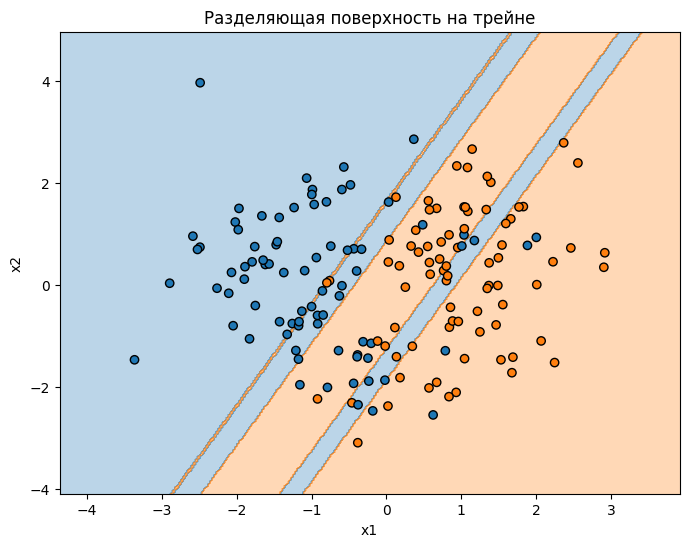

In [42]:
def plot_decision_surface(pipe, X, y):
    # Достаём обученный классификатор
    clf = pipe.named_steps['tree']
    transformer = pipe.named_steps['custom']

    # Получаем границы
    x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
    y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Применяем ту же трансформацию
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_df = pd.DataFrame(X_grid, columns=['x1', 'x2'])
    Z = clf.predict(transformer.transform(X_grid_df))
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.figure(figsize=(8, 6))
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)

    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap, edgecolor='k')
    plt.title('Разделяющая поверхность на трейне')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# Вызов функции
plot_decision_surface(pipe, X_train, Y_train)